<a href="https://colab.research.google.com/github/riminipa16/CodeAlpha_Credit_Scoring_Model/blob/main/credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The libraries

In [1]:
from matplotlib import axes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 1: Load The Dataset

In [2]:
# Load The Dataset
df = pd.read_csv('/content/loan_data_1248_with_missing.csv')
df.head(10)


,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0
5,NaN,18244.339419,36,1.0,0
6,NaN,23366.013955,60,1.0,1
7,65813.825125,8742.153888,60,1.0,0
8,43549.461053,26035.434321,36,1.0,1
9,61766.080785,18514.114056,60,1.0,0


Step 2: Understanding the data type and shape of the dataset

In [3]:
df.shape

(1248, 5)

In [4]:
df.columns.tolist()

['income', 'loan_amount', 'term', 'credit_history', 'defaulted']

In [5]:
df.dtypes

,0
income,float64
loan_amount,float64
term,int64
credit_history,float64
defaulted,int64


Step 3: Preprocessing Data

1. Check for missing values

In [6]:
df.isnull().sum()

,0
income,120
loan_amount,122
term,0
credit_history,112
defaulted,0


2. Mean or Median imputation

In [7]:
df.fillna({'income' :df['income'].median()}, inplace=True)
df.fillna({'loan_amount' :df['loan_amount'].median()}, inplace=True)
df.fillna({'credit_history' :df['credit_history'].mode()[0]}, inplace=True)

In [8]:
df.isnull().sum()

,0
income,0
loan_amount,0
term,0
credit_history,0
defaulted,0


3.Summary Statistics

In [9]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


Step 4: Data visualization

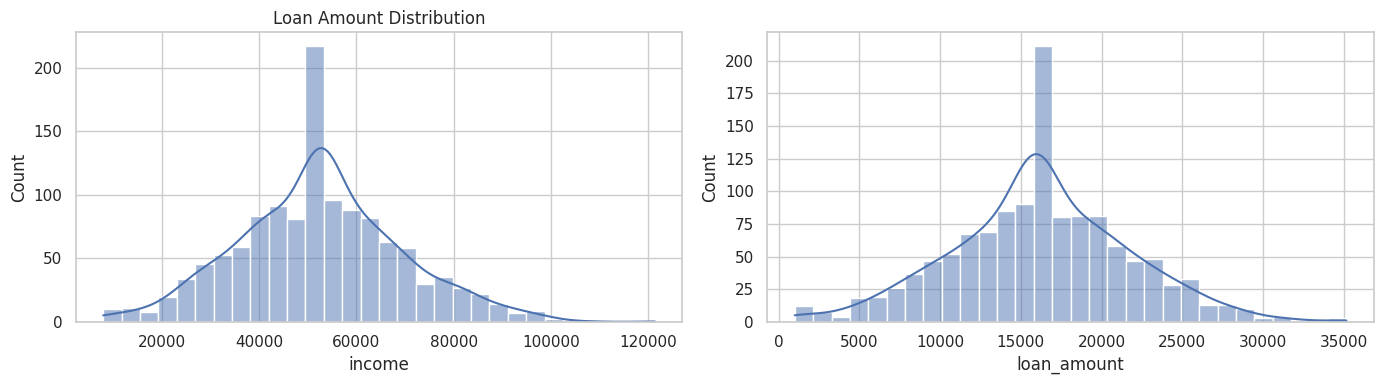

In [10]:
# set seaborn theme
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,2, figsize=(14, 4))

sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Income Distribution')

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[0].set_title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

Loan Term COunt Plot

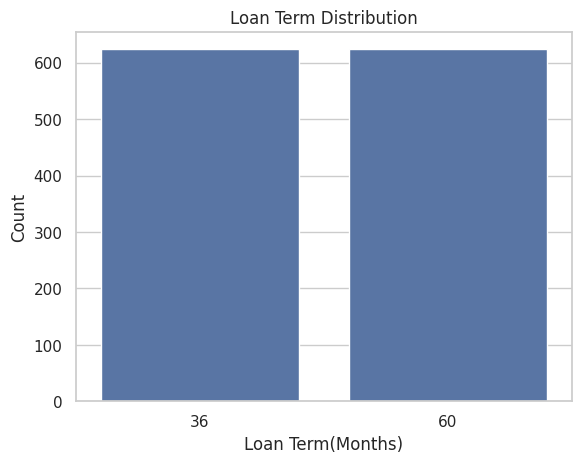

In [11]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term(Months)")
plt.ylabel("Count")
plt.show()

Credit history vs Defaulted

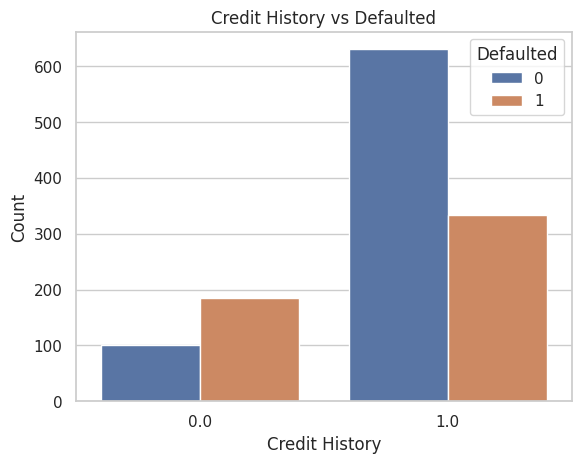

In [12]:
sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title("Credit History vs Defaulted")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Defaulted", loc="upper right")
plt.show()

Correlation Heatmap

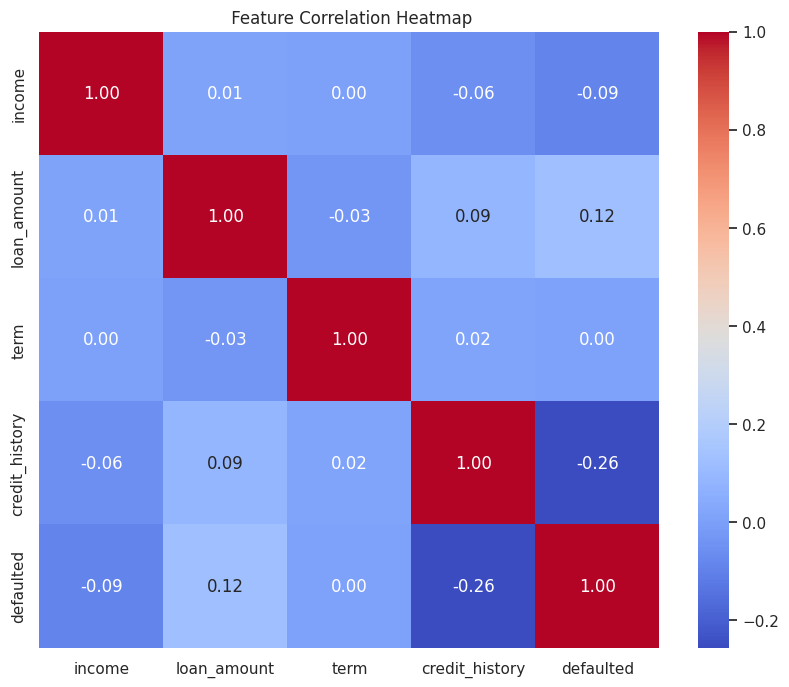

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Feature Correlation Heatmap")
plt.show()

Step 5: Feature Engineering

1.Convert Categorical Features

In [14]:
df['term_binary'] = df['term'].apply(lambda x: 1 if x ==60 else 0)

2.Create Derived Features

In [15]:
df['log_income'] = np.log(df['income'])
df['log_loan_amount'] = np.log(df['loan_amount'])

Feature Selection

In [16]:
features = ['log_income', 'log_loan_amount', 'credit_history']
target = 'defaulted'

Step 6: Model Training

In [17]:
scaler = StandardScaler()

scale_features = ['log_income', 'log_loan_amount']

df[scale_features] = scaler.fit_transform(df[scale_features])
df.head()

,income,loan_amount,term,credit_history,defaulted,term_binary,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555863,0.335127
1,49511.242579,6664.626123,36,0.0,0,0,0.010034,-1.753651
2,63658.393686,17985.281393,60,0.0,1,1,0.670512,0.406785
3,79414.537415,21001.173770,36,1.0,0,0,1.251676,0.744155
4,47785.239255,4037.586145,36,1.0,0,0,-0.083212,-2.844309


2.Train Test Split

In [18]:
x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Build Model Pipeline

In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [20]:
for name, model in models.items():
  print(f"\nModel:{name}")
  pipeline = Pipeline([
        ('classifier', model)
    ])
  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print("Classification Report:")
  print(classification_report(y_test, y_pred))



Model:Logistic Regression
Accuracy: 0.6520
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       143
           1       0.67      0.37      0.48       107

    accuracy                           0.65       250
   macro avg       0.66      0.62      0.61       250
weighted avg       0.66      0.65      0.63       250


Model:Decision Tree
Accuracy: 0.5400
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       143
           1       0.46      0.44      0.45       107

    accuracy                           0.54       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.54      0.54      0.54       250


Model:Random Forest
Accuracy: 0.6080
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       143
           1       0.55      0.46      0.50     